# Od prowadzacego:
Jesli uzyje gotowej bilioteki do permutacji to moze sie okazac ze po usunieciu polaczen bede musial sprawdzac czy dane polaczenie jest dopuszczalnym rozwiazaniem. Dlatego bedziemy budowac drzewu stan. Uporzadkuje przestrzen stanow zeby moc przeszukiwac. Wiec drzewo, KOrzen to miejsce startu. Liście to dopuszczalne rozwiazania. Wiec sprawdzamy czy istnieje polaczenie i czy juz w nim nie bylem. naliczymy sie mniej jesli bedziemy koszt dodawac na biezaco przy kazdym kroku a nie dopiero na koniec dla kazdej z mozliwosci generowac koszt. Sprawdzam czy w stanie koncowym czyli tak naprawde: czy z ostatniego miasta jestem w stanie wrocic do miasta poczatkowego. Moge robic drzewo w taki sposob ze nie A->B tylko AB stan, AC, AD potem ABC, ABD itd. Realnie konsumenckie 12-13 miast. Czas i pamiec zeby mierzyc. Pamiec jest mniej istotna, miekkie wnioski ale jesli chodzi o czas to jest istotny bardzo. Teorytycznie BFS i DFS powinny trwac tyle samo. Moga sie roznic przez dostep czasowy do tych struktur w ktorych jest przechowywany. Jesli chodzi o pamiec to powinny sie roznic. Po pokazaniu sie po prostu wrzuci zadanie, te 4 pierwsze oddaje sie naraz i wtedy w kazde zadanei na teamsie wrzucam to samo. 

# Pytania do zadania  
Czy do BFS dodawać mozliwosc wracania?  
Wyjasic na przykladzie jak BFS dziala ze znalezieinem najkrotszej drogi?

NN - czy punkt startowy moze byc ustalony? Czy ma byc ruchomy i dla roznych punktow startowych przeliczać koszty  
Full Search czy mamy uwzgledniać jakoś cofanie się do innych miast jeśli miałoby to oznaczać mniejszy koszt trasy?

# Uwagi dla siebie
w NN zaimplementowalem start z roznych punktow startowych, dlatego wynik dla NN wyszedl lepszy niz dla Full Search

# 0.0 DFS
Depth-First Search (DFS) is a popular algorithm used for traversing or searching through graph or tree data structures. It starts at a source node (or vertex) and explores as far along each branch or path as possible before backtracking. 

This means it dives deep into the graph before moving to other branches, hence the name "depth-first." DFS can be implemented using either recursion or a stack.

## 0.0.1 DFS Approach

Approach: DFS explores as deep as possible along a branch before backtracking. It uses a stack (or recursion) to keep track of nodes and backtracks when it reaches a dead end.

How it works: Starting from the source node, DFS goes deeper into the graph, visiting one branch of the graph first before backtracking to explore others.

![DFS](dfs.jpg)

Traversal Order: 
Starting from node 0:

Visit node 0 → Visit node 1 → Visit node 4 (deepest) → Backtrack to node 1 → Visit node 5 → Backtrack to node 0 → Visit node 2 → Visit node 6 → Backtrack to node 2 → Visit node 3 → Visit node 7.

Output: 0, 1, 4, 5, 2, 6, 3, 7

## 0.0.2 DFS Use cases  
Exploring all possible paths or solving puzzles like mazes.
# 0.1 BFS
BFS (Breadth-First Search) is a graph traversal algorithm that explores nodes level by level, starting from a given source node. It visits all neighboring nodes at the current depth (or level) before moving on to nodes at the next depth level. BFS is commonly used for traversing or searching tree or graph data structures.

## 0.1.1. BFS Approach
BFS explores the graph level by level, starting from the source node. It visits all the nodes at one level before moving to the next. BFS uses a queue to keep track of nodes that need to be explored.

How it works: From the source node, BFS moves to all its direct neighbors (Layer 1), then moves to the next layer (Layer 2), continuing until all nodes are visited.

![BFS](bfs.jpg)

Traversal Order: 
Starting from node 0:

Layer 0: Visit node 0 (source node).

Layer 1: Visit nodes 1, 2, 3 (neighbors of node 0).

Layer 2: Visit nodes 4, 5, 6, 7 (neighbors of nodes 1, 2, 3).

Output: 0, 1, 2, 3, 4, 5, 6, 7.

## 0.1.2 BFS Use cases
Finding the shortest path in an unweighted graph(like social networks, web crawlers).

# 0.2 Time and Space Complexity

Time complexity of both approaches is equal: O(V + E) (V = vertices, E = edges)

Space complexity for BFS: O(V) (due to queue storing nodes at the current level)  Space complexity for DFS: O(V) (due to recursion or explicit stack)

# 0.3 Adjacency matrix  (macierz sąsiedztwa)
In graph theory and computer science, an adjacency matrix is a square matrix used to represent a finite graph. The elements of the matrix indicate whether pairs of vertices are adjacent or not in the graph.

# 1. Traveling salesman problem (TSP), implementation of a full search of the tree, BFS, DFS methods

## 1.1 Create a set of cities 

As points with coordinates x, y on a plane with height as z coordinate. The cost of going from city A to city B is equal to the Euclidean distance between two cities, if there exists a road. You should define scenarios according to two criteria:

1.There are all the direct connections / c.a. 80% of possible connections
2.The problem is symmetrical / asymmetrical (in asymmetrical – going up is height +10%, going down: -10%)
You should choose the coordinates randomly from the range <-100, 100> for x,y and <0, 50> for z.


In [13]:
import random
import math
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque
import itertools
import pandas as pd
from IPython.display import display
import graphviz

# Constants for city coordinates
MIN_X, MAX_X = -100, 100
MIN_Y, MAX_Y = -100, 100
MIN_Z, MAX_Z = 0, 50

# Seting constant seed
random.seed(42)

class City:
    """Represents a city with random 3D coordinates."""
    city_counter = 0 # Static variable to keep track of the city ID generation

    def __init__(self):
        self.id = City.city_counter
        City.city_counter += 1
        self.x = random.randint(MIN_X, MAX_X)
        self.y = random.randint(MIN_Y, MAX_Y)
        self.z = random.randint(MIN_Z, MAX_Z) 

    
    def calculate_distance_symetric(self, other: 'City') -> float: # other parameter is expected to be an instance of the class City
        """Calcuate the Euclidean distance between this city and another city."""
        distance = pow((other.x - self.x)**2 + (other.y - self.y)**2 + (other.z - self.z)**2, 1/2) # sqrt is pow 1/2 
        return round(distance, 2)
    
    
    def calculate_distance_asymetric(self, other: 'City') -> float:
        """Calcuate the Euclidean distance between this city and another city having regard to height, z. Case asymetrical."""
        distance = self.calculate_distance_symetric(other) # call the other method in the same class
        if other.z > self.z: # Going upwards
            distance *= 1.1
        elif other.z < self.z: # Going downwards
            distance *= 0.9
        return round(distance, 2)


def generate_list_of_cities(number_of_cities: int) -> list[City]:
    """Generate a list of City obcjets.""" 
    return [City() for _ in range(number_of_cities)] # I create objects, instances of the class City in the list 

## 1.2 Connections
Represent the created map as a weighted (directed) graph, where cities are the nodes and roads are the edges of the graph.


In [14]:
def generate_adjacency_matrix(list_of_cities: list['City'], distance_function, connection_probability: float, symmetrical: bool) -> list[list[float]]: # adjacency with using list
    """Generate a adjacency matrix representing distances between cities."""
    size = len(list_of_cities)
    adjacency_matrix = [[math.inf for _ in range(size)] for _ in range(size)] # firstly I have to initialize a list 
    
    for i in range(size):
            for j in range(i + 1, size): # thanks to i+1 it will fill up only up triangle matrix
                if i != j:
                    distance = math.inf
                    
                    if random.random() < connection_probability: # random.random returns a random floating number between 0 and 1 
                        distance =  distance_function(list_of_cities[i], list_of_cities[j])
                        #adjacency_matrix_symetrical_all_connections[i][j] =  list_of_cities[i].calculate_distance_symetric(list_of_cities[j]) # pay attention that I actually use a method 
                        # on a list of instance of the class City
                        adjacency_matrix[i][j] = distance

                    if symmetrical:
                        adjacency_matrix[j][i] = distance
                    
                    else: #asymmetrical case
                        if random.random() < connection_probability: # checking if the reverse connection exsits
                            adjacency_matrix[j][i] = distance_function(list_of_cities[j], list_of_cities[i])

    return adjacency_matrix

NUMBER_OF_CITIES = 10

cities = generate_list_of_cities(NUMBER_OF_CITIES) # now I have a list of cities 

def draw_graph(cities: list[City], adjacency_matrix: list[list[float]], symmetrical: bool):
    """Generate a plot to visualize weighted graph on a 2D plane"""
    if symmetrical:
        graph = nx.DiGraph() #  Creating directed graph for symmetrical case
    else: 
        graph = nx.MultiDiGraph() # Creating directed graph for asymmetrical case
    
    pos = {city.id: (city.x, city.y) for city in cities} # Position of cities on the graph

    for i, city_from in enumerate(cities):
        for j, city_to in enumerate(cities):
            if i != j:
                if adjacency_matrix[i][j] != float('inf'): # if there is conncection between cities
                    graph.add_edge(city_from.id, city_to.id, weight=adjacency_matrix[i][j])
                    
                    
    # Drawwing graph
    plt.figure(figsize=(10,8))
    draw_params = { # I can create a dictioniary with parameters which are common for both functions and asign parameters which are different in conditional 'if' 
        "pos": pos,
        "with_labels": True,
        "node_size": 700,
        "node_color": "lightblue",
        "font_size": 10,
        "edge_color": "gray",
        "arrows": True,
    }

    if not symmetrical:
        draw_params["connectionstyle"] = "arc3,rad=0.1"
    
    nx.draw(graph, **draw_params) # unpacking dict

    # Adding weights
    edge_labels = {(u, v): d['weight'] for u, v, d in graph.edges(data=True)}
    if symmetrical:
        nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=9)
    else:
        nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=9, connectionstyle="arc3,rad=0.1")


    plt.axis("on")
    plt.xlabel("X Coordinates")
    plt.ylabel("Y Coordinates")
    plt.title("Graph Represantation of cities")
    plt.show()

## 1.3 Solving the traveling salesman problem 
The salesman starts from a chosen city and has to visit every city exactly once before returning to the starting city. The goal is to find a path with the lowest cost.

In the problem, we define state as a partial or full path from the starting city and the corresponding state. You should represent the search problem in a form of state tree.



In [15]:
class State:
    """Represents a state in the search tree."""

    def __init__ (self, current_path: list[int], current_cost: float, remaining_cities: list[int]):
        self.current_path = current_path
        self.current_cost = current_cost
        self.remaining_cities = remaining_cities
        self.children: list[State] = []
        self.parent: None

    def add_child(self, child_state: 'State') -> None:
        """Add a child state to this state"""
        self.children.append(child_state)
        child_state.parent = self

    def is_leaf(self) -> bool:
        """Check if this state is a leaf node (no remaining cities), checking is a return road available is implemented in class Tree"""
        return (len(self.remaining_cities) == 0)

    def __repr__(self) -> str:
        return f"State(path={self.current_path}, cost={self.current_cost:.1f}, remaining={self.remaining_cities})"
    

class Tree:
    """Tree of states"""

    def __init__(self, adjacency_matrix: list[list[float]]):
        self.root = State(current_path=[0], current_cost=0, remaining_cities=list(range(1, len(adjacency_matrix))))
        self.levels : dict[int, list[State]] = {0: [self.root]} # Level 0 is root
        self.adjacency_matrix = adjacency_matrix
        self.leaves: list[State] = []
        self._build_tree()


    def _build_tree(self) -> None:
        """Build the complete state tree"""
        current_level = 0

        while current_level in self.levels:
            
            next_level = current_level + 1
            self.levels[next_level] = [] # Creating an empty level

            for state in self.levels[current_level]: # Generating states in a new level
                
                if not state.is_leaf(): # If state is not a solution
                    self._expand_state(state) # Generate all posible child states from this state
                    self.levels[next_level].extend(state.children)
                else:
                    self.leaves.append(state) # If state is a last city, so it is a solution

            if not self.levels[next_level]: # If this level is empty 
                del self.levels[next_level]
                break

            current_level = next_level # Going on next level


    def _expand_state(self, state: State) -> None: 
        """Generate all possible child states from current state"""
        for city in state.remaining_cities:
            
            new_path = state.current_path + [city]
            last_city = state.current_path[-1]
            new_cost = state.current_cost + self.adjacency_matrix[last_city][city]
            new_remaining = [city_remain for city_remain in state.remaining_cities if city_remain != city]

            child_state = State(new_path, new_cost, new_remaining)
            state.add_child(child_state)


    def find_optimal_path(self) -> tuple[list[int], float]:
        """Finds the otpimal path by examining all leaf nodes"""
        min_cost = math.inf
        best_path = None

        for leaf in self.leaves:
            # Adding return to starting city
            if self.adjacency_matrix[leaf.current_path[-1]][leaf.current_path[0]] != math.inf: # If road is available
                complete_cost = leaf.current_cost + self.adjacency_matrix[leaf.current_path[-1]][leaf.current_path[0]]
                complete_path = leaf.current_path + [leaf.current_path[0]]

            if complete_cost < min_cost:
                min_cost = complete_cost
                best_path = complete_path

        return best_path, min_cost

def visualize_tree(root):
    dot = Digraph()

    def add_nodes_edges(state):
        dot.node(str(id(state)), label=f"Path: {state.current_path}\nCost: {state.current_cost}")

        for child in state.children:
            dot.edge(str(id(state)), str(id(child)))
            add_nodes_edges(child)
    
    add_nodes_edges(root)
    return dot




### 1.3.1 BFS solver

In [16]:
def bfs_shortest_path(start_city: City, all_cities: list[City], adjacency_matrix: list[list[float]]) -> tuple[list[int], float]:
    num_cities = len(all_cities)
    start_id = start_city.id

    # Queue for collecting paths and costs
    queue = deque()
    queue.append(([start_id], 0.0))

    # Inicialization of best path and her cost
    best_path = []
    best_cost = float('inf')

    while queue:
        current_path, current_cost = queue.popleft()

        # If we had visited all cities and we came back to the start point
        if len(current_path) == (num_cities + 1) and current_path[-1] == start_id:
            
            if current_cost < best_cost:
                best_path = current_path
                best_cost = current_cost
            continue

        # If we had visited all cities but we didn't come back to the start point
        if len(current_path) == num_cities:
            last_city = current_path[-1]

            if adjacency_matrix[last_city][start_id] != math.inf: # If road between last city and start city exists
                new_path = current_path + [start_id]
                new_cost = current_cost + adjacency_matrix[last_city][start_id]
                queue.append((new_path, new_cost))
            continue

        # Adding another cities to visit
        last_city = current_path[-1]
        for next_city in range(num_cities):

            if next_city not in current_path and adjacency_matrix[last_city][next_city] != math.inf:
                new_path = current_path + [next_city]
                new_cost = current_cost + adjacency_matrix[last_city][next_city]
                queue.append((new_path, new_cost))

    return best_path, best_cost


### 1.3.2 DFS solver

In [17]:
def dfs_shortest_path(start_city: City, all_cities: list[City], adjacency_matrix: list[list[float]]) -> tuple[list[int], float]:
    num_cities = len(all_cities)
    start_id = start_city.id

    # Queue for collecting paths and costs
    stack = deque()
    stack.append(([start_id], 0.0))

    # Inicialization of best path and its cost
    best_path = []
    best_cost = float('inf')

    while stack:
        current_path, current_cost = stack.pop() 

        # If we had visited all cities and we came back to the start point
        if len(current_path) == (num_cities + 1) and current_path[-1] == start_id:
            if current_cost < best_cost:
                best_path = current_path
                best_cost = current_cost
            continue

        last_city = current_path[-1]

        # If we had visited all cities but we didn't come back to the start point
        if len(current_path) == num_cities and adjacency_matrix[last_city][start_id] != math.inf:
            new_path = current_path + [start_id]
            new_cost = current_cost + adjacency_matrix[last_city][start_id]
            stack.append((new_path, new_cost))
            continue

        # Searching for next cities to go
        for next_city in range(num_cities):
            if next_city not in current_path and adjacency_matrix[last_city][next_city] != math.inf:
                new_path = current_path + [next_city]
                new_cost = current_cost + adjacency_matrix[last_city][next_city]
                
                # Adding only if the cost is lower than the best so far
                if new_cost < best_cost:
                    stack.append((new_path, new_cost))

    return best_path, best_cost

### 1.2.1 All connections, symmetrical 

[inf, 51.34, 115.76, 204.72, 43.68, 58.52, 143.17, 130.51, 53.1, 154.59]
[51.34, inf, 140.26, 195.45, 72.72, 102.96, 166.68, 104.17, 58.45, 113.01]
[115.76, 140.26, inf, 141.44, 83.62, 73.8, 51.43, 146.5, 87.32, 181.07]
[204.72, 195.45, 141.44, inf, 188.87, 189.91, 122.56, 114.39, 169.77, 140.73]
[43.68, 72.72, 83.62, 188.87, inf, 49.53, 122.78, 137.19, 29.39, 159.33]
[58.52, 102.96, 73.8, 189.91, 49.53, inf, 97.99, 147.5, 70.18, 183.56]
[143.17, 166.68, 51.43, 122.56, 122.78, 97.99, inf, 145.62, 124.04, 190.33]
[130.51, 104.17, 146.5, 114.39, 137.19, 147.5, 145.62, inf, 113.79, 55.52]
[53.1, 58.45, 87.32, 169.77, 29.39, 70.18, 124.04, 113.79, inf, 131.5]
[154.59, 113.01, 181.07, 140.73, 159.33, 183.56, 190.33, 55.52, 131.5, inf]


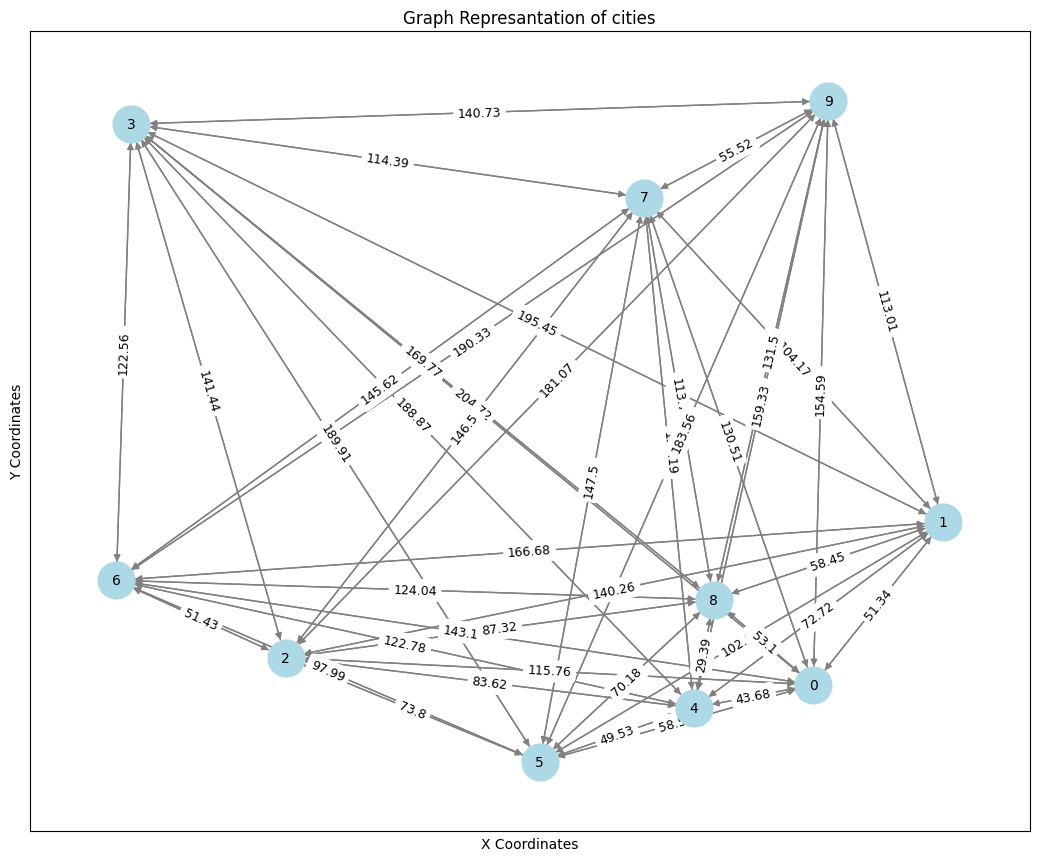

Path for BFS algorythm: [0, 1, 9, 7, 3, 6, 2, 5, 4, 8, 0] and her cost is: 714.07
Path for DFS algorythm: [0, 8, 4, 5, 2, 6, 3, 7, 9, 1, 0] and her cost is: 714.07
Optimal TSP solution has path: [0, 1, 9, 7, 3, 6, 2, 5, 4, 8, 0] and cost: 714.07


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [18]:
adjacency_matrix_symetrical_all_connections = generate_adjacency_matrix(cities, City.calculate_distance_symetric, connection_probability=1, symmetrical=True)

for row in adjacency_matrix_symetrical_all_connections:
    print(row)

draw_graph(cities, adjacency_matrix_symetrical_all_connections, symmetrical=True)
bfs_path, bfs_cost = bfs_shortest_path(cities[0], cities, adjacency_matrix_symetrical_all_connections)
print(f"Path for BFS algorythm: {bfs_path} and her cost is: {bfs_cost:.2f}")
dfs_path, dfs_cost = dfs_shortest_path(cities[0], cities, adjacency_matrix_symetrical_all_connections)
print(f"Path for DFS algorythm: {dfs_path} and her cost is: {dfs_cost:.2f}")

tsp_tree = Tree(adjacency_matrix=adjacency_matrix_symetrical_all_connections)
best_path, min_cost = tsp_tree.find_optimal_path()
print(f"Optimal TSP solution has path: {best_path} and cost: {min_cost}")
visualize_tree(tsp_tree.root).render('tsp_tree', view=True)

### 1.2.2 All connections, asymmetrical

[inf, 56.47, 127.34, 225.19, 48.05, 58.52, 157.49, 130.51, 58.41, 170.05]
[46.21, inf, 154.29, 215.0, 79.99, 92.66, 150.01, 93.75, 64.3, 124.31]
[104.18, 126.23, inf, 141.44, 75.26, 66.42, 46.29, 131.85, 78.59, 162.96]
[184.25, 175.91, 141.44, inf, 169.98, 170.92, 110.3, 102.95, 152.79, 126.66]
[39.31, 65.45, 91.98, 207.76, inf, 44.58, 110.5, 123.47, 32.33, 143.4]
[58.52, 113.26, 81.18, 208.9, 54.48, inf, 107.79, 147.5, 77.2, 201.92]
[128.85, 183.35, 56.57, 134.82, 135.06, 88.19, inf, 131.06, 136.44, 209.36]
[130.51, 114.59, 161.15, 125.83, 150.91, 147.5, 160.18, inf, 125.17, 61.07]
[47.79, 52.61, 96.05, 186.75, 26.45, 63.16, 111.64, 102.41, inf, 118.35]
[139.13, 101.71, 199.18, 154.8, 175.26, 165.2, 171.3, 49.97, 144.65, inf]


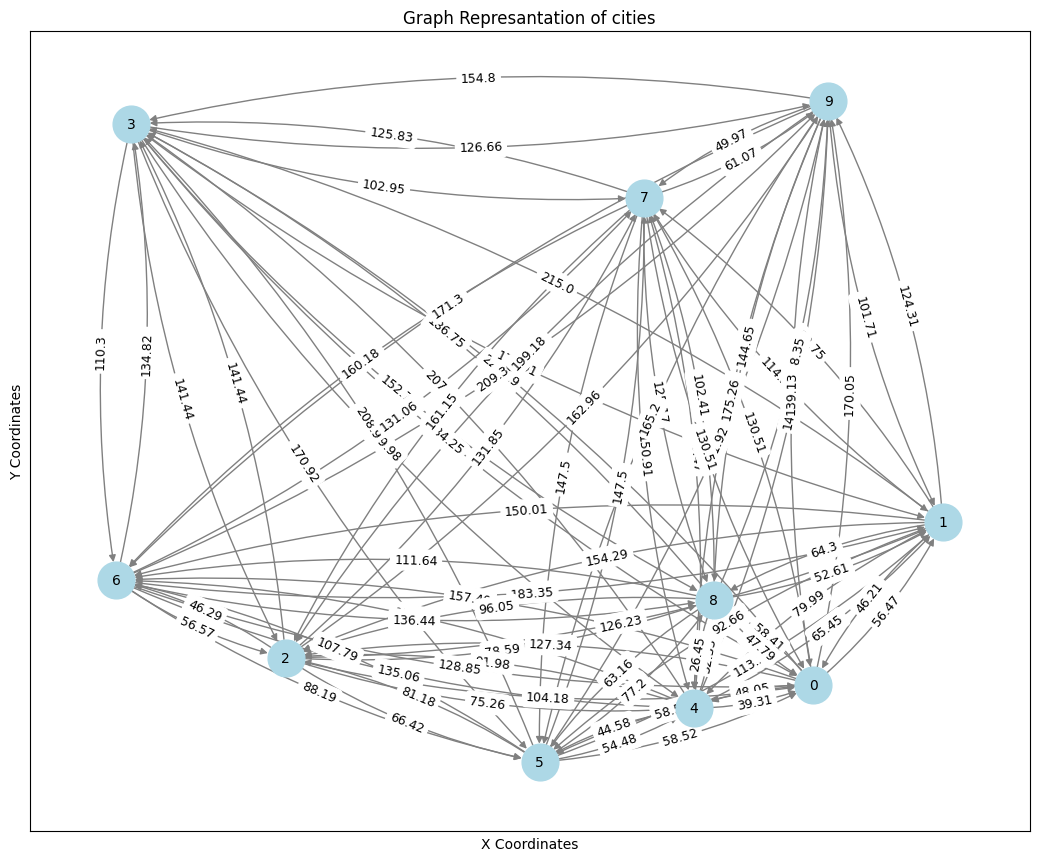

Path for BFS algorythm: [0, 8, 4, 5, 2, 6, 3, 7, 9, 1, 0] and her cost is: 703.67
Path for DFS algorythm: [0, 8, 4, 5, 2, 6, 3, 7, 9, 1, 0] and her cost is: 703.67
Optimal TSP solution has path: [0, 8, 4, 5, 2, 6, 3, 7, 9, 1, 0] and cost: 703.6700000000001


In [ ]:
adjacency_matrix_asymetrical_all_connections = generate_adjacency_matrix(cities, City.calculate_distance_asymetric, connection_probability=1, symmetrical=False)

for row in adjacency_matrix_asymetrical_all_connections:
    print(row)
    
draw_graph(cities, adjacency_matrix_asymetrical_all_connections, symmetrical=False)
bfs_path, bfs_cost = bfs_shortest_path(cities[0], cities, adjacency_matrix_asymetrical_all_connections)
print(f"Path for BFS algorythm: {bfs_path} and her cost is: {bfs_cost:.2f}")
dfs_path, dfs_cost = dfs_shortest_path(cities[0], cities, adjacency_matrix_asymetrical_all_connections)
print(f"Path for DFS algorythm: {dfs_path} and her cost is: {dfs_cost:.2f}")

tsp_tree = Tree(adjacency_matrix=adjacency_matrix_asymetrical_all_connections)
best_path, min_cost = tsp_tree.find_optimal_path()
print(f"Optimal TSP solution has path: {best_path} and cost: {min_cost}")

Skoro zaczynamy z drzewa to nastepne możliwe kroku to 0->2 lub 0->3 lub 0->1 potem musimy poszukać najlepszej trasy wlasnie miedzy tymi trzema punktami.  
0->1->2->3->0 : 536,45  
0->1->3->2->0 : 517,09  
0->2->1->3->0 : 525,48  
0->2->3->1->0 : 490,9  
0->3->1->2->0 : 659,57  
0->3->2->1->0 : 539,07  


### 1.2.3 80% of possible connections, symmetrical

[inf, 51.34, 115.76, inf, 43.68, 58.52, 143.17, 130.51, 53.1, 154.59]
[51.34, inf, 140.26, 195.45, 72.72, 102.96, 166.68, 104.17, 58.45, 113.01]
[115.76, 140.26, inf, 141.44, 83.62, 73.8, inf, 146.5, 87.32, 181.07]
[inf, 195.45, 141.44, inf, 188.87, 189.91, 122.56, 114.39, 169.77, inf]
[43.68, 72.72, 83.62, 188.87, inf, 49.53, 122.78, 137.19, 29.39, 159.33]
[58.52, 102.96, 73.8, 189.91, 49.53, inf, inf, 147.5, 70.18, 183.56]
[143.17, 166.68, inf, 122.56, 122.78, inf, inf, 145.62, 124.04, 190.33]
[130.51, 104.17, 146.5, 114.39, 137.19, 147.5, 145.62, inf, inf, 55.52]
[53.1, 58.45, 87.32, 169.77, 29.39, 70.18, 124.04, inf, inf, inf]
[154.59, 113.01, 181.07, inf, 159.33, 183.56, 190.33, 55.52, inf, inf]


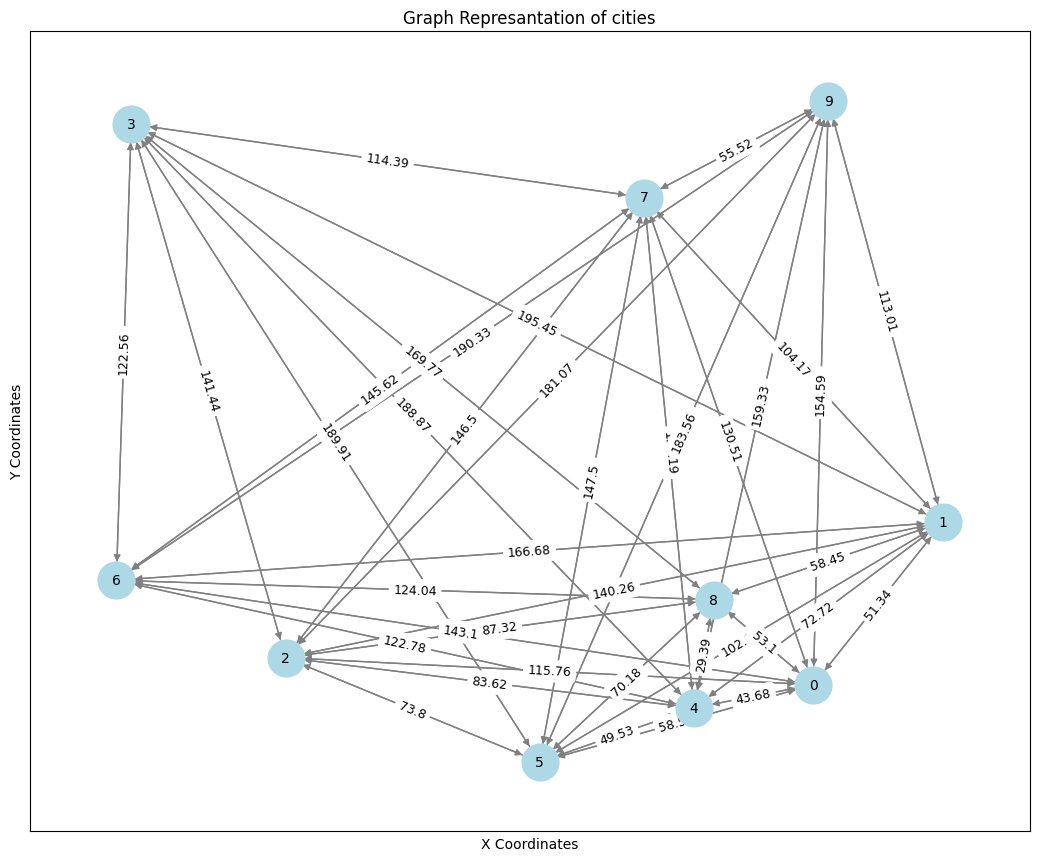

Path for BFS algorythm: [0, 1, 9, 7, 3, 6, 8, 4, 2, 5, 0] and her cost is: 826.19
Path for DFS algorythm: [0, 1, 9, 7, 3, 6, 8, 4, 2, 5, 0] and her cost is: 826.19
Optimal TSP solution has path: [0, 1, 9, 7, 3, 6, 8, 4, 2, 5, 0] and cost: 826.1899999999999


In [ ]:
adjacency_matrix_symetrical_80_per_connections = generate_adjacency_matrix(cities, City.calculate_distance_symetric, connection_probability=0.8, symmetrical=True) # default probability of connection is 80%

for row in adjacency_matrix_symetrical_80_per_connections:
    print(row)
    
draw_graph(cities, adjacency_matrix_symetrical_80_per_connections, symmetrical=True)
bfs_path, bfs_cost = bfs_shortest_path(cities[0], cities, adjacency_matrix_symetrical_80_per_connections)
print(f"Path for BFS algorythm: {bfs_path} and her cost is: {bfs_cost:.2f}")
dfs_path, dfs_cost = dfs_shortest_path(cities[0], cities, adjacency_matrix_symetrical_80_per_connections)
print(f"Path for DFS algorythm: {dfs_path} and her cost is: {dfs_cost:.2f}")

tsp_tree = Tree(adjacency_matrix=adjacency_matrix_symetrical_80_per_connections)
best_path, min_cost = tsp_tree.find_optimal_path()
print(f"Optimal TSP solution has path: {best_path} and cost: {min_cost}")

### 1.2.4 80% of possible connections, asymmetrical

[inf, inf, 127.34, 225.19, 48.05, 58.52, inf, 130.51, 58.41, 170.05]
[46.21, inf, 154.29, 215.0, 79.99, 92.66, 150.01, 93.75, 64.3, 124.31]
[104.18, 126.23, inf, 141.44, 75.26, inf, inf, 131.85, 78.59, 162.96]
[184.25, 175.91, inf, inf, 169.98, 170.92, 110.3, 102.95, inf, 126.66]
[39.31, 65.45, 91.98, 207.76, inf, 44.58, 110.5, 123.47, 32.33, 143.4]
[58.52, 113.26, 81.18, 208.9, 54.48, inf, 107.79, inf, 77.2, inf]
[inf, 183.35, 56.57, 134.82, 135.06, inf, inf, inf, inf, 209.36]
[130.51, 114.59, 161.15, inf, 150.91, 147.5, 160.18, inf, 125.17, 61.07]
[inf, inf, 96.05, 186.75, 26.45, 63.16, 111.64, 102.41, inf, 118.35]
[139.13, 101.71, 199.18, 154.8, 175.26, 165.2, 171.3, inf, 144.65, inf]


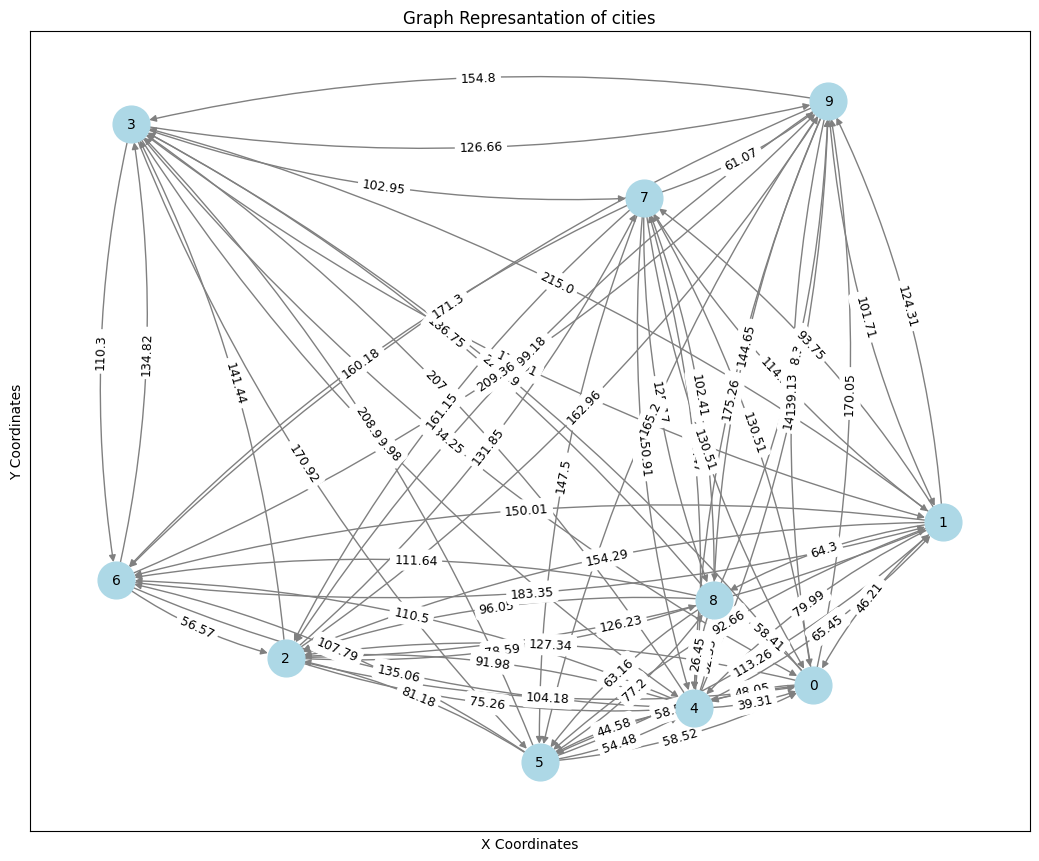

Path for BFS algorythm: [0, 8, 4, 5, 6, 2, 3, 7, 9, 1, 0] and her cost is: 747.18
Path for DFS algorythm: [0, 8, 4, 5, 6, 2, 3, 7, 9, 1, 0] and her cost is: 747.18
Optimal TSP solution has path: [0, 8, 4, 5, 6, 2, 3, 7, 9, 1, 0] and cost: 747.1800000000002


In [ ]:
adjacency_matrix_asymetrical_80_per_connections = generate_adjacency_matrix(cities, City.calculate_distance_asymetric, connection_probability=0.8, symmetrical=False) # default probability of connection is 80%

for row in adjacency_matrix_asymetrical_80_per_connections:
    print(row)
    
draw_graph(cities, adjacency_matrix_asymetrical_80_per_connections, symmetrical=False)
bfs_path, bfs_cost = bfs_shortest_path(cities[0], cities, adjacency_matrix_asymetrical_80_per_connections)
print(f"Path for BFS algorythm: {bfs_path} and her cost is: {bfs_cost:.2f}")
dfs_path, dfs_cost = dfs_shortest_path(cities[0], cities, adjacency_matrix_asymetrical_80_per_connections)
print(f"Path for DFS algorythm: {dfs_path} and her cost is: {dfs_cost:.2f}")

tsp_tree = Tree(adjacency_matrix=adjacency_matrix_asymetrical_80_per_connections)
best_path, min_cost = tsp_tree.find_optimal_path()
print(f"Optimal TSP solution has path: {best_path} and cost: {min_cost}")

Skoro przeczesujemy drzewo algorytmem BFS i zaczynamy z punktu zerowego to możemy wykonać kroki albo z 0->2 lub z 0->3, więc to właśnie punkty 2 oraz 3 są w pierwszym poziomie drzewa, więc następny krok będzie to analogicznie 2->3 lub 3->2 a na końcu do 1 przenalizujmy w takim razie koszty:  
0->2->3->1->0: 490,9  
0->3->2->1->0: 539


# 2. Nearest Neighbour  

These are the steps of the algorithm:  

* Initialize all vertices as unvisited.
* Select an arbitrary vertex, set it as the current vertex u. Mark u as visited.
* Find out the shortest edge connecting the current vertex u and an unvisited vertex v.
* Set v as the current vertex u. Mark v as visited.
* If all the vertices in the domain are visited, then terminate. Else, go to step 3.  

The nearest neighbour algorithm was one of the first algorithms used to solve the travelling salesman problem approximately. The algorithm quickly yields a short tour, but usually not the optimal one. The nearest neighbour algorithm is easy to implement and executes quickly, but it can sometimes miss shorter routes which are easily noticed with human insight, due to its "greedy" nature. As a general guide, if the last few stages of the tour are comparable in length to the first stages, then the tour is reasonable; if they are much greater, then it is likely that much better tours exist.  

Worst-case performance: $\Theta=N^2$  
Worst-case space complexity: $\Theta=N$  

## 2.1 Nearest Neighbour implementation

In [ ]:
class NearestNeigbourOwn():
    """Implementation of Nearest Neighbour Algorythm"""
    def __init__(self, cities: list[City], adjacency_matrix: list[list[float]]):
        self.cities = cities
        self.adjacency_matrix = adjacency_matrix
        self.size = len(cities)


    def NN_find_path(self, start_city: City) -> tuple[list[int], float]:
        """Finding path and its cost thanks to NN algorythm"""
        cities_visted = [False] * self.size
        cities_visted[start_city.id] = True 
        path = [start_city.id]
        cost = 0
        
        while not all(cities_visted):
            shortest_way = math.inf
            next_city = None

            for city in range(self.size):

                if not cities_visted[city] and self.adjacency_matrix[path[-1]][city] < shortest_way: # If this city wasn't visited and it is the shortest available move
                    shortest_way = self.adjacency_matrix[path[-1]][city]
                    next_city = city

            if next_city is None:
                raise ValueError("No available path")
            
            cost += shortest_way
            path.append(next_city)
            cities_visted[next_city] = True
        
        # Adding cost of return
        if self.adjacency_matrix[path[-1]][start_city.id] != math.inf: # Checking is there connection between last city and starting point
            return_cost = self.adjacency_matrix[path[-1]][start_city.id]
            cost += return_cost
            path.append(start_city.id)
        
        return path, cost

    def finding_best_starting_point(self) -> tuple[list[int], float]:
        """Searching for best path beginning with different cities and chosing the shortest"""
        best_path = None
        best_cost = math.inf

        for start_city in self.cities:
            try:
                path, cost = self.NN_find_path(start_city)
                if cost < best_cost:
                    best_path, best_cost = path, cost
            except ValueError:
                continue # Lets ignore these paths, which can't be completed

        return best_path, best_cost

### 2.1.1 All connections, symmetrical

In [ ]:
NN_solver = NearestNeigbourOwn(cities, adjacency_matrix_symetrical_all_connections)
NN_path, NN_cost = NN_solver.finding_best_starting_point()
print(f"The path for NN is: {NN_path} and has cost: {NN_cost:.2f}") 
NN_paths = [NN_path]
NN_costs = [NN_cost]

The path for NN is: [3, 7, 9, 1, 0, 4, 8, 5, 2, 6, 3] and has cost: 725.30


### 2.1.2 All connections, asymmetrical

In [ ]:
NN_solver = NearestNeigbourOwn(cities, adjacency_matrix_asymetrical_all_connections)
NN_path, NN_cost = NN_solver.finding_best_starting_point()
print(f"The path for NN is: {NN_path} and has cost: {NN_cost:.2f}") 
NN_paths.append(NN_path)
NN_costs.append(NN_cost)

The path for NN is: [3, 7, 9, 1, 0, 4, 8, 5, 2, 6, 3] and has cost: 717.77


### 2.1.3 80% of possible connections, symmetrical

In [ ]:
NN_solver = NearestNeigbourOwn(cities, adjacency_matrix_symetrical_80_per_connections)
NN_path, NN_cost = NN_solver.finding_best_starting_point()
print(f"The path for NN is: {NN_path} and has cost: {NN_cost:.2f}") 
NN_paths.append(NN_path)
NN_costs.append(NN_cost)

The path for NN is: [6, 3, 7, 9, 1, 0, 4, 8, 5, 2] and has cost: 673.87


### 2.1.4 80% of possible connections, asymmetrical

In [ ]:
NN_solver = NearestNeigbourOwn(cities, adjacency_matrix_asymetrical_80_per_connections)
NN_path, NN_cost = NN_solver.finding_best_starting_point()
print(f"The path for NN is: {NN_path} and has cost: {NN_cost:.2f}")
NN_paths.append(NN_path)
NN_costs.append(NN_cost)

The path for NN is: [7, 9, 1, 0, 4, 8, 5, 2, 3, 6] and has cost: 685.45


# 3. Full Search

## 3.1 Full Search implementaition

In [ ]:
class FullSearchOwn():
    """Implementation of Full Search Algorythm"""
    def __init__(self, cities: list[City], adjacency_matrix: list[list[float]]):
        self.cities = cities
        self.adjacency_matrix = adjacency_matrix
        self.size = len(cities)

    def calculate_path_cost(self, path: list[int]) -> float:
        """ Computing cost of the path including return"""
        cost = 0
        for i in range(len(path) - 1):
            cost += self.adjacency_matrix[path[i]][path[i + 1]] # adding cost of return in this place like this will cause error beceause of index out of range
            # for i in range(len(path)):  # error
                # cost += self.adjacency_matrix[path[i]][path[i + 1]]

        # Adding cost of return
        cost += self.adjacency_matrix[path[-1]][path[0]]
        return cost

    

    def find_best_path(self) -> tuple[list[int], float]:
        """Searching for best path with full search algorythm"""
        best_path = None
        best_cost = math.inf

        all_cities = [city.id for city in cities]

        for perm in itertools.permutations(all_cities[1:]):
            path = [all_cities[0]] + list(perm)
            cost = self.calculate_path_cost(path)

            if cost < best_cost:
                best_path, best_cost = path, cost

        return best_path, best_cost

### 3.1.1 All connections, symmetrical

In [ ]:
full_search_solver = FullSearchOwn(cities, adjacency_matrix_symetrical_all_connections)
full_search_best_path, full_search_best_cost = full_search_solver.find_best_path()
print(f"The best path according to full search is: {full_search_best_path} and has cost: {full_search_best_cost:.2f}")
FS_paths = [full_search_best_path]
FS_costs = [full_search_best_cost]

The best path according to full search is: [0, 1, 9, 7, 3, 6, 2, 5, 4, 8] and has cost: 714.07


### 3.1.2 All connections, asymmetrical

In [ ]:
full_search_solver = FullSearchOwn(cities, adjacency_matrix_asymetrical_all_connections)
full_search_best_path, full_search_best_cost = full_search_solver.find_best_path()
print(f"The best path according to full search is: {full_search_best_path} and has cost: {full_search_best_cost:.2f}")
FS_paths.append(full_search_best_path)
FS_costs.append(full_search_best_cost)

The best path according to full search is: [0, 8, 4, 5, 2, 6, 3, 7, 9, 1] and has cost: 703.67


### 3.1.3 80% of possible connections, symmetrical

In [ ]:
full_search_solver = FullSearchOwn(cities, adjacency_matrix_symetrical_80_per_connections)
full_search_best_path, full_search_best_cost = full_search_solver.find_best_path()
print(f"The best path according to full search is: {full_search_best_path} and has cost: {full_search_best_cost:.2f}")
FS_paths.append(full_search_best_path)
FS_costs.append(full_search_best_cost)

The best path according to full search is: [0, 1, 9, 7, 3, 6, 8, 4, 2, 5] and has cost: 826.19


### 3.1.4 80% of possible connections, asymmetrical

In [ ]:
full_search_solver = FullSearchOwn(cities, adjacency_matrix_asymetrical_80_per_connections)
full_search_best_path, full_search_best_cost = full_search_solver.find_best_path()
print(f"The best path according to full search is: {full_search_best_path} and has cost: {full_search_best_cost:.2f}")
FS_paths.append(full_search_best_path)
FS_costs.append(full_search_best_cost)

The best path according to full search is: [0, 8, 4, 5, 6, 2, 3, 7, 9, 1] and has cost: 747.18


## 3.2 Comparison of NN and Full Search Algorythm

In [ ]:
cases = ["All connections, symmetrical", "All connections, asymmetrical", "0.8 of possible connections, symmetrical", "0.8 of possible connections, asymmetrical"]

df = pd.DataFrame({
    "Case": cases,
    "NN Path": NN_paths,
    "NN Cost": NN_costs,
    "FS Path": FS_paths,
    "FS Cost": FS_costs
})

display(df.style.set_table_styles([{"selector": "th", "props": [("background-color", "dark")]}]).hide(axis="index").format({"NN Cost": "{:.2f}", "FS Cost": "{:.2f}"}))
# .style enables stylization for DataFrame in pandas
# selector is a selection of headers of the table

Case,NN Path,NN Cost,FS Path,FS Cost
"All connections, symmetrical","[3, 7, 9, 1, 0, 4, 8, 5, 2, 6, 3]",725.30,"[0, 1, 9, 7, 3, 6, 2, 5, 4, 8]",714.07
"All connections, asymmetrical","[3, 7, 9, 1, 0, 4, 8, 5, 2, 6, 3]",717.77,"[0, 8, 4, 5, 2, 6, 3, 7, 9, 1]",703.67
"0.8 of possible connections, symmetrical","[6, 3, 7, 9, 1, 0, 4, 8, 5, 2]",673.87,"[0, 1, 9, 7, 3, 6, 8, 4, 2, 5]",826.19
"0.8 of possible connections, asymmetrical","[7, 9, 1, 0, 4, 8, 5, 2, 3, 6]",685.45,"[0, 8, 4, 5, 6, 2, 3, 7, 9, 1]",747.18
